In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("seismic-bumps.csv")

In [3]:
df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0


## Feature preprocessing (light)

In [4]:
#remove useless variables
column2drop = ['seismoacoustic', 'gdenergy', 'gdpuls', 'hazard', 'nbumps3', 'nbumps4', 'nbumps5', 'nbumps6', 'nbumps7', 'nbumps89', 'energy']
df.drop(column2drop, axis=1, inplace=True)

In [5]:
df.head()

,seismic,shift,genergy,gpuls,nbumps,nbumps2,maxenergy,class
0,a,N,15180,48,0,0,0,0
1,a,N,14720,33,1,0,2000,0
2,a,N,8050,30,0,0,0,0
3,a,N,28820,171,1,0,3000,0
4,a,N,12640,57,0,0,0,0


In [23]:
###### Lecture Pipeline ######
# you can/have to modify the order for your project,
# e.g. hyperparameter tuning before evaluating a decision tree

# Hold-out
from sklearn.model_selection import train_test_split

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Optional: KNN
from sklearn.neighbors import KNeighborsClassifier

######## Evaluation #######
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
# Optional: baseline comparison
from sklearn.dummy import DummyClassifier
###########################

# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# cross-validation
from sklearn.model_selection import cross_val_score

In [7]:
# if you have problem with the Decision Tree Visualization

import os
os.environ['PATH'] += os.pathsep + 'C:/Users/Username/Anaconda3/Library/bin/graphviz'

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['seismic'] = le.fit_transform(df['seismic'])
df['shift'] = le.fit_transform(df['shift'])

In [9]:
df['shift'].values[:5]

array([0, 0, 0, 0, 0])

In [10]:
# Hold-out

attributes = [col for col in df.columns if col != 'class']
X = df[attributes].values
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [11]:
df.shape, X_train.shape, X_test.shape

((2584, 8), (1808, 7), (776, 7))

In [12]:
clf = DecisionTreeClassifier(criterion='entropy',
                             max_depth=None ,
                             min_samples_split=10,
                             min_samples_leaf=5,
                            )

clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5,
                       min_samples_split=10)

In [13]:
imp_dict = {attr: clf.feature_importances_[i] for i, attr in enumerate(attributes)}
imp_dict

{'seismic': 0.016759127177292395,
 'shift': 0.0,
 'genergy': 0.25874794320467387,
 'gpuls': 0.4002739839279979,
 'nbumps': 0.22599926789240057,
 'nbumps2': 0.01574010014247446,
 'maxenergy': 0.08247957765516103}

In [14]:
{k: v for k, v in sorted(imp_dict.items(), key=lambda item: item[1], reverse=True)}

{'gpuls': 0.4002739839279979,
 'genergy': 0.25874794320467387,
 'nbumps': 0.22599926789240057,
 'maxenergy': 0.08247957765516103,
 'seismic': 0.016759127177292395,
 'nbumps2': 0.01574010014247446,
 'shift': 0.0}

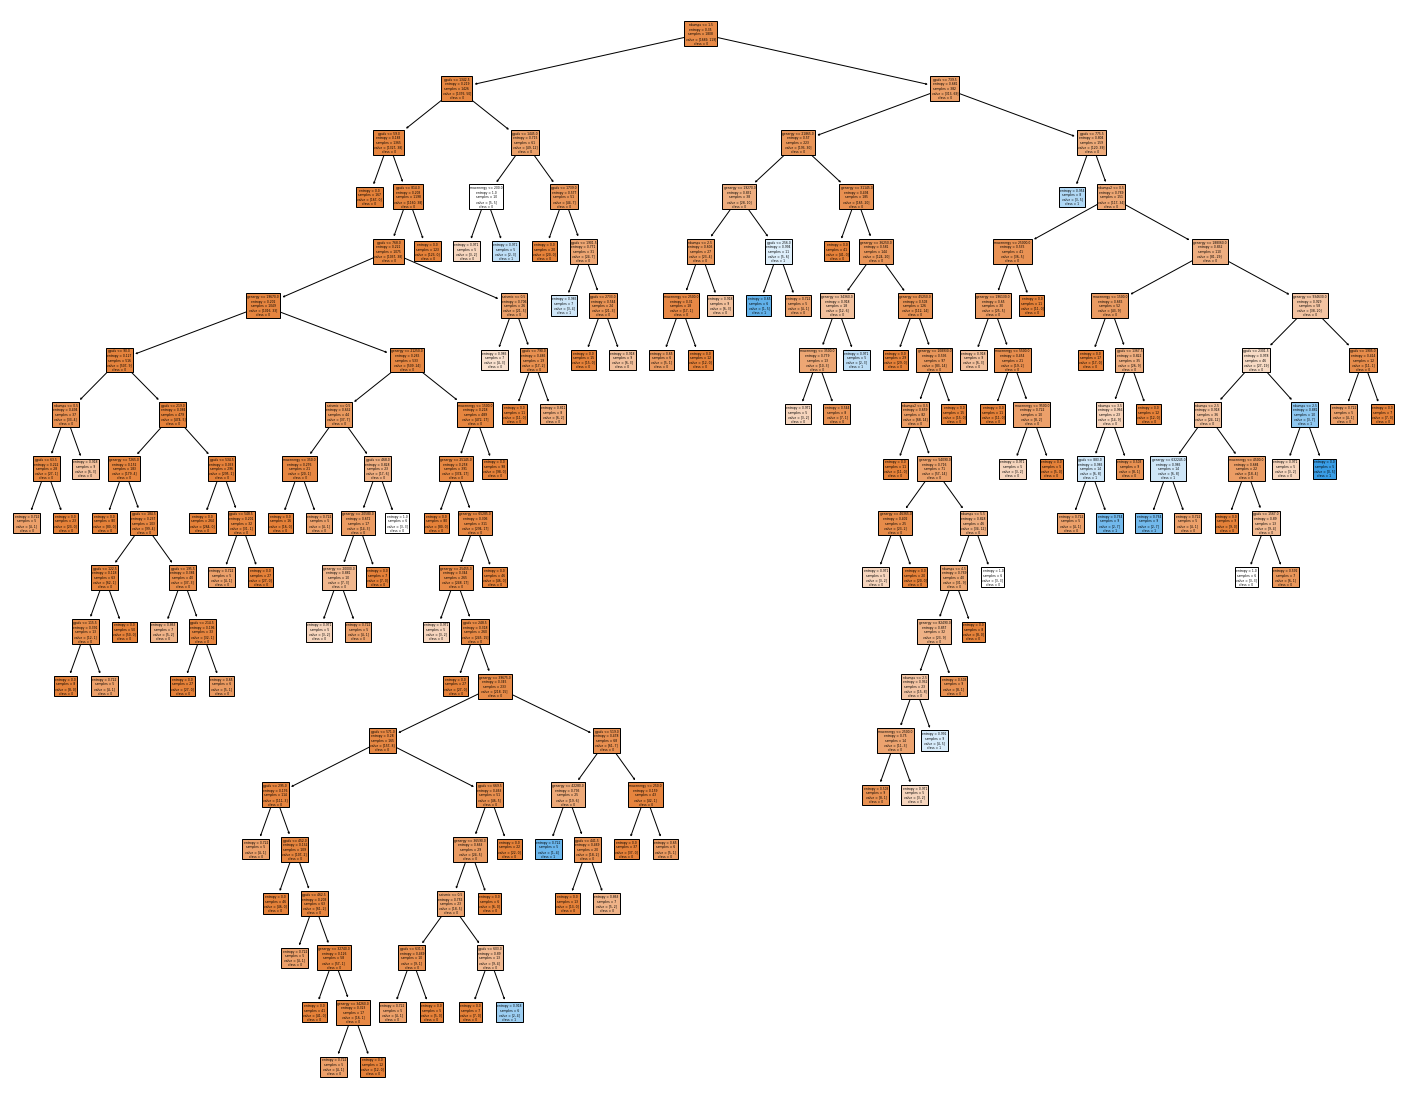

In [24]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=attributes,  
                   class_names=[str(v) for v in clf.classes_],
                   filled=True)

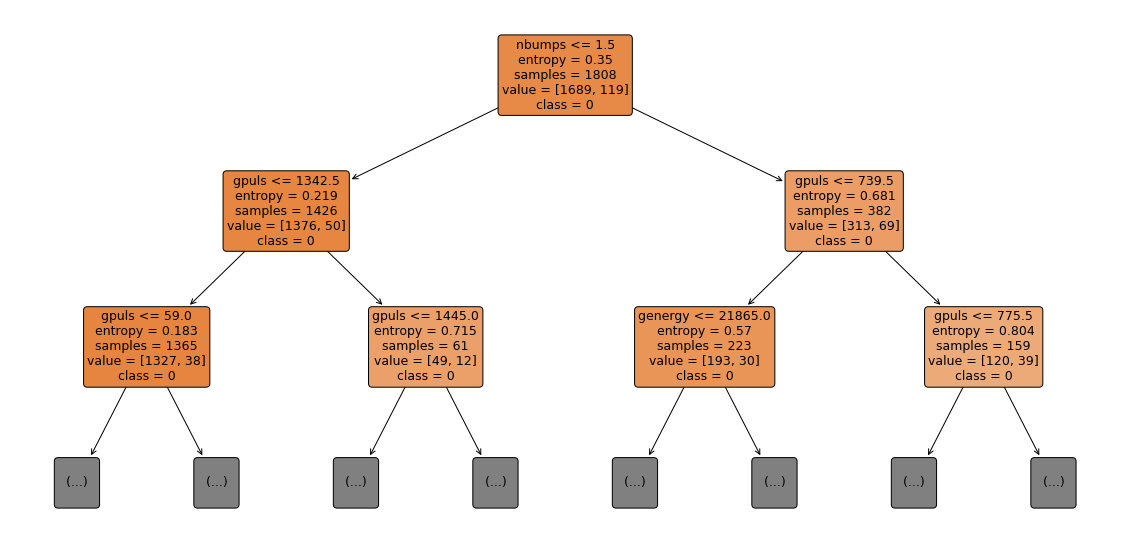

In [25]:
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(clf, 
                   feature_names=attributes,  
                   class_names=[str(v) for v in clf.classes_],
                   filled=True, rounded=True,
                                max_depth=2)

In [26]:
y_pred = clf.predict(X_train)

In [27]:
print('Accuracy', accuracy_score(y_train, y_pred))
print('F1', f1_score(y_train, y_pred, average=None))

Accuracy 0.9507743362831859
F1 [0.97399942 0.5388601 ]


In [28]:
print( classification_report(y_train, y_pred) )

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1689
           1       0.70      0.44      0.54       119

    accuracy                           0.95      1808
   macro avg       0.83      0.71      0.76      1808
weighted avg       0.94      0.95      0.95      1808



In [29]:
# SUGGESTED FOR THE PROJECT

cf = confusion_matrix(y_train, y_pred, labels=[1,0])
cf

array([[  52,   67],
       [  22, 1667]])

In [30]:
y_pred = clf.predict( X_test )

In [31]:
y_score = clf.predict_proba(X_test)
y_score[:6]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [32]:
fpr, tpr, th = roc_curve(y_test, y_score[:,1])

roc_auc = auc(fpr, tpr)
print(roc_auc)

0.6217849898580122


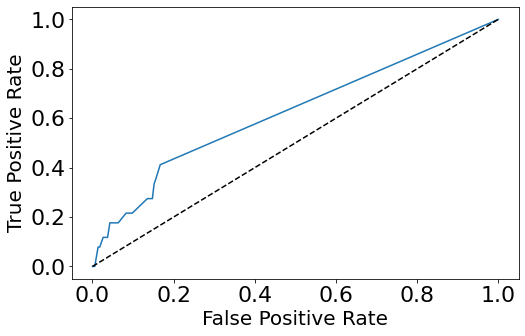

In [33]:
plt.figure(figsize=(8,5))

plt.plot(fpr, tpr)

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)

plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()